In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import sin, diff
from sympy.abc import x

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers.legacy import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Question 6

### 6.a

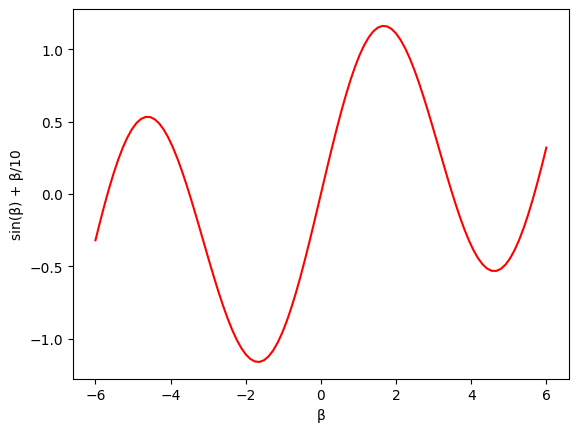

In [2]:
betas = np.linspace(-6, 6, 100)
r_beta = np.sin(betas) + betas/10

plt.plot(betas, r_beta, 'r-')
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

### 6.b

In [3]:
# The derivative of the function
eq = sin(x) + x/10
diff(eq,x)

cos(x) + 1/10

### 6.c

In [4]:
def gradient_descent(x_init, dx, learning_rate):
    beta = x_init
    step = []

    for i in range(100):
        gradient = dx.evalf(subs={x:beta})
        if abs(gradient) > 0.1:
            step.append(beta)
            beta = beta - learning_rate * float(gradient)

    return step

In [5]:
dx = diff(eq, x)
beta = 2.3
learning_rate = 0.1

step = gradient_descent(beta, dx, learning_rate)

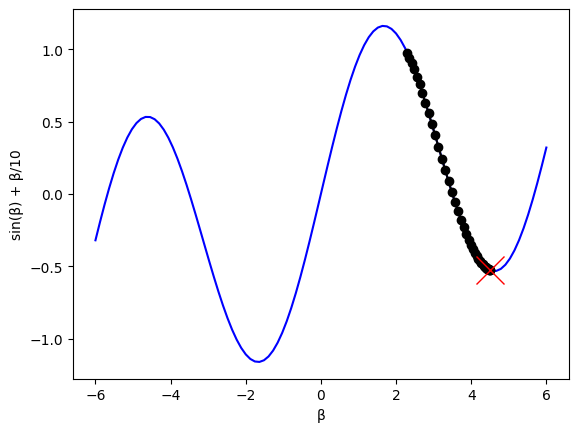

In [6]:
step = np.array(step)
response = np.sin(step) + step/10

plt.plot(betas, r_beta, 'b')
plt.plot(step, response, 'k', marker='o')
plt.plot(step[np.argmin(response)], np.min(response), 'r', marker='x', markersize=20)
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

### 6.d

In [7]:
dx = diff(eq, x)
beta = 1.4
learning_rate = 0.1

step = gradient_descent(beta, dx, learning_rate)

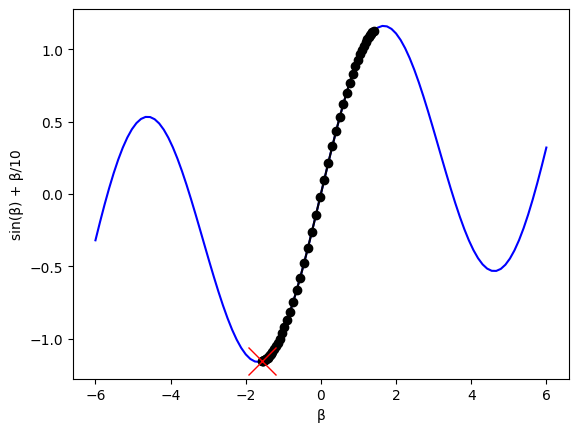

In [8]:
step = np.array(step)
response = np.sin(step) + step/10

plt.plot(betas, r_beta, 'b')
plt.plot(step, response, 'k', marker='o')
plt.plot(step[np.argmin(response)], np.min(response), 'r', marker='x', markersize=20)
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

## Question 7

In [9]:
default = pd.read_csv('../../data/default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [10]:
# checking for missing values
default.isna().any()

default    False
student    False
balance    False
income     False
dtype: bool

In [11]:
# one hot encode
default = pd.get_dummies(default)
default.drop(['default_No', 'student_No'], axis=1, inplace=True)
default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [12]:
X = default.drop(['default_Yes'], axis=1)
y = default['default_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# Build Neural Network

model = Sequential(
    [
        Dense(units=10, activation='relu', input_shape=(3,)),
        Dropout(0.4),
        Dense(units=1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
44/44 [==============================] - 0s 2ms/step - loss: 10951.1074 - accuracy: 0.0893 - val_loss: 8981.7012 - val_accuracy: 0.0264
Epoch 2/30
44/44 [==============================] - 0s 681us/step - loss: 7526.6128 - accuracy: 0.0918 - val_loss: 5678.7012 - val_accuracy: 0.0264
Epoch 3/30
44/44 [==============================] - 0s 571us/step - loss: 4398.5718 - accuracy: 0.1513 - val_loss: 2648.3933 - val_accuracy: 0.0264
Epoch 4/30
44/44 [==============================] - 0s 599us/step - loss: 2159.8325 - accuracy: 0.3595 - val_loss: 571.0454 - val_accuracy: 0.0264
Epoch 5/30
44/44 [==============================] - 0s 558us/step - loss: 1234.7073 - accuracy: 0.5620 - val_loss: 11.5462 - val_accuracy: 0.9707
Epoch 6/30
44/44 [==============================] - 0s 591us/step - loss: 992.1060 - accuracy: 0.6520 - val_loss: 19.8958 - val_accuracy: 0.9729
Epoch 7/30
44/44 [==============================] - 0s 543us/step - loss: 870.8209 - accuracy: 0.6518 - val_loss: 27.37

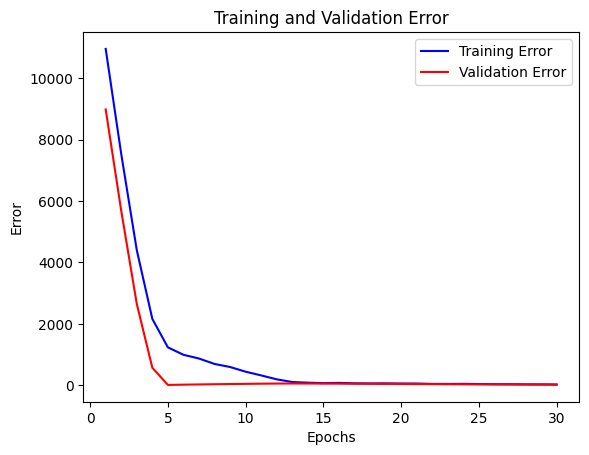

In [15]:
train_errors = history.history['loss']
val_errors = history.history['val_loss']

epochs = np.arange(1, len(train_errors)+1)
plt.plot(epochs, train_errors, 'b-', label='Training Error')
plt.plot(epochs, val_errors, 'r-', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [16]:
# NN - Test set error
print('NN - Test set accuracy', model.evaluate(X_test, y_test)[1])

94/94 [==============================] - 0s 309us/step - loss: 28.2333 - accuracy: 0.9613
NN - Test set accuracy 0.9613333344459534


In [17]:
# Fit Logistic Regression model

logit = LogisticRegression(fit_intercept=True)
logit.fit(X_train, y_train)

print('Logistic Reg. - Test set accuracy', logit.score(X_test, y_test))

Logistic Reg. - Test set accuracy 0.9633333333333334


## Question 8

In [18]:
img_dir = '../../data/exercise_images'
image_names = os.listdir(img_dir)[2:]
num_images = len(image_names)

x = np.zeros((num_images, 224, 224, 3))

for i in range(num_images):
    img_path = os.path.join(img_dir, image_names[i])
    img = Image.open(img_path)
    img = img.resize((224, )*2, resample=Image.LANCZOS)
    x[i] = np.array(img)

x = x / 255.0

In [19]:
model = ResNet50(weights='imagenet')

y_pred = model.predict(x)

decoded_pred = decode_predictions(y_pred)

pred_dict = {image_names[i]: decoded_pred[i] for i in range(num_images)}
pred_dict

## TODO

1/1 [==============================] - 0s 366ms/step


{'dog1.jpeg': [('n01930112', 'nematode', 0.13957228),
  ('n03041632', 'cleaver', 0.041829836),
  ('n03838899', 'oboe', 0.03764276),
  ('n04270147', 'spatula', 0.025976982),
  ('n02783161', 'ballpoint', 0.024893042)],
 'dog2.jpeg': [('n01930112', 'nematode', 0.14302254),
  ('n03041632', 'cleaver', 0.040206756),
  ('n03838899', 'oboe', 0.036031637),
  ('n04270147', 'spatula', 0.026359435),
  ('n02783161', 'ballpoint', 0.02513886)],
 'monkey.jpeg': [('n01930112', 'nematode', 0.15002942),
  ('n03838899', 'oboe', 0.034583326),
  ('n03041632', 'cleaver', 0.033273246),
  ('n04270147', 'spatula', 0.027620923),
  ('n03476684', 'hair_slide', 0.022341829)],
 'elephant.jpeg': [('n01930112', 'nematode', 0.12512147),
  ('n03041632', 'cleaver', 0.039908227),
  ('n03838899', 'oboe', 0.034672968),
  ('n04270147', 'spatula', 0.027110185),
  ('n02783161', 'ballpoint', 0.02343159)],
 'eagle.jpeg': [('n01930112', 'nematode', 0.14268786),
  ('n03041632', 'cleaver', 0.03585404),
  ('n03838899', 'oboe', 0.032

## Question 9-12

Unfortunately, I was unable to access the NYSE dataset used in the time series prediction section of the ISLR book.

## Question 13
We achieved a test accuracy of 0.8414 when we set MAX_FEATURES to 10000.

In [20]:
INDEX_FROM = 3

word_index = imdb.get_word_index()
word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

def decode_review(text, word_index):
    idx_to_word = {value:key for key, value in word_index.items()}
    words = [idx_to_word[i] for i in text]
    return ' '.join(words)

In [21]:
def get_dataset(MAX_FEATURES=10000, INDEX_FROM=3):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES, index_from=INDEX_FROM)

    tokenizer = Tokenizer(num_words=MAX_FEATURES)

    X_train_1h = tokenizer.sequences_to_matrix(X_train, mode='binary')
    X_test_1h = tokenizer.sequences_to_matrix(X_test, mode='binary')

    return (X_train_1h, y_train), (X_test_1h, y_test)

In [22]:
def cases(max_feature_list):
    test_accuracy_scores = []

    for max_ftr in max_feature_list:
        (X_train, y_train), (X_test, y_test) = get_dataset(MAX_FEATURES=max_ftr)

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=3)

        model = Sequential(
            [
              Dense(units=16, activation='relu', input_shape=(max_ftr, )),
              Dense(units=16, activation='relu'),
              Dense(units=1, activation='sigmoid')
            ]
        )

        model.compile(
          loss=BinaryCrossentropy(),
          optimizer=RMSprop(),
          metrics=['accuracy']
        )

        model.fit(X_train, y_train, epochs=20, batch_size=512,
                  validation_data=(X_val, y_val), verbose=0)

        test_accuracy_scores.append(model.evaluate(X_test, y_test, verbose=0)[1])

    return test_accuracy_scores

In [23]:
max_feature_list = [1000, 3000, 5000, 10000]

results = cases(max_feature_list)

In [24]:
df = pd.DataFrame({'Max Feature Num': max_feature_list, 'Test Set Accuracy': results})
df = df.sort_values(by='Test Set Accuracy', ascending=False)
df

,Max Feature Num,Test Set Accuracy
1,3000,0.85936
2,5000,0.85268
0,1000,0.85196
3,10000,0.84848
